In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Step 1: Create or Load the Dataset
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])

In [3]:
df.head()

,Feature1,Feature2
0,4.627632,1.075915
1,1.932565,5.601569
2,0.741996,5.033909
3,1.398611,0.948782
4,-8.750419,-7.231623


In [6]:
df.shape

(500, 2)

In [7]:
df.describe()

,Feature1,Feature2
count,500.000000,500.000000
mean,-2.308268,3.152304
std,5.277122,5.717919
min,-11.535214,-9.182031
25%,-7.397592,1.373790
50%,-2.544467,4.400229
75%,2.668964,7.785927
max,6.954537,11.734455


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  500 non-null    float64
 1   Feature2  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
df.isnull().sum()

Feature1    0
Feature2    0
dtype: int64

# Splitting the data 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Kmeans and elbow method and Silhouette Score

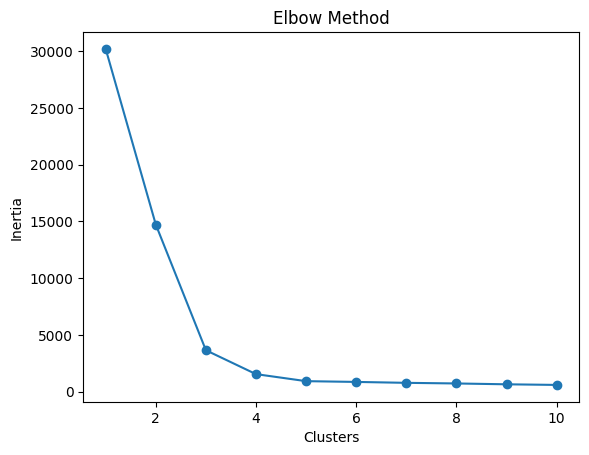

In [17]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()



Silhouette Score: 0.678738720085253


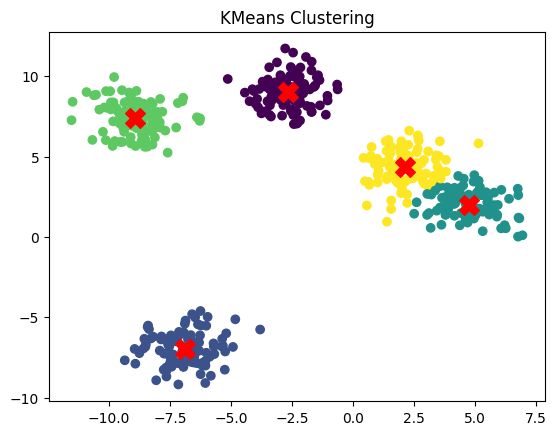

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

silhouette_avg = silhouette_score(X, df['Cluster'])
print("Silhouette Score:", silhouette_avg)

plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("KMeans Clustering")
plt.show()

# Elbow Curve:

* X-axis: Number of clusters.
* Y-axis: Inertia (sum of squared distances to centroids).
* Look for the "elbow point," where the rate of decrease in inertia slows down, suggesting the optimal number of clusters.
# Cluster Visualization:

* Colored points represent data grouped into clusters.
* Red 'X' markers are the centroids of the clusters.